# ДЗ-4

В этой работе вам предстоит закрепить основные команды взаимодействия с открытыми API.

За это задание можно получить до 8 баллов (включительно).

Код можно писать в нескольких ячейках.

## Задание "Карточные фокусы"

В этом задании вам предстоит взаимодействите с открытым API: `https://deckofcardsapi.com`

Основные эндпойнты:
1. Создать стопку из `N` колод кард по 52 карты каждая

`https://deckofcardsapi.com/api/deck/new/shuffle/?deck_count=N` (вместо `N` нужно вставить свое число)

После вызова метода будет возвращен `json`, из которого основной информацией будет значение по ключу `deck_id`


Пример: `get` запроса `"https://deckofcardsapi.com/api/deck/new/shuffle/?deck_count=3"` вернет
```json
{
    "success": true,
    "deck_id": "lcww1uui6bf6",
    "remaining": 156,
    "shuffled": true
}
```


2. Метод извлечения `N` карт из созданной колоды по `deck_id`


Пример: `get` запрос `https://deckofcardsapi.com/api/deck/lcww1uui6bf6/draw/?count=2` вернет
```json
{
    "success": true,
    "deck_id": "lcww1uui6bf6",
    "cards": [
        {
            "code": "7H",
            "image": "https://deckofcardsapi.com/static/img/7H.png",
            "images": {
                "svg": "https://deckofcardsapi.com/static/img/7H.svg",
                "png": "https://deckofcardsapi.com/static/img/7H.png"
            },
            "value": "7",
            "suit": "HEARTS"
        },
        {
            "code": "3C",
            "image": "https://deckofcardsapi.com/static/img/3C.png",
            "images": {
                "svg": "https://deckofcardsapi.com/static/img/3C.svg",
                "png": "https://deckofcardsapi.com/static/img/3C.png"
            },
            "value": "3",
            "suit": "CLUBS"
        }
    ],
    "remaining": 154
}
```

Обратите внимание, после извлечения карты не возвращаются в колоду.

### Описание структуры JSON

Основные поля `json` при создании колоды:
* remaining - количество карт, которые остались в колоде (уменьшается при извлечении)
* deck_id - идентификатор созданной колоды
* shuffled - флаг того, что колода перемешана или нет
* success - флаг того, что метод все завершилось корректно

При вызове метода на извлечение карт из колоды добавляются поля:
* cards - список извлеченных карт с описанием

Описание карты:
* code - код карты (составлен из номинала и первой буквы масти)
* image - ссылка на изображение в .png формате
* images - список других форматов изображений (.png и .svg)
* value - значение карты
* suit - масть

### Задача 1 (1 балл)

Напишите программу, которая запрашивает по API создание колоды из четырех мастей. Извлеките идентификатор колоды для дальнейшей работы и выведите структуру `json`, которая вам поступает в ответ, а таже статус-код.

In [1]:
import requests
import json

# 1. Создать колоду из четырех мастей (4 колоды по 52 карты)
deck_count = 4
url = f"https://deckofcardsapi.com/api/deck/new/shuffle/?deck_count={deck_count}"

# Отправляем GET запрос
response = requests.get(url)

# Выводим статус-код
print(f"Статус-код: {response.status_code}")
print()

# Выводим структуру JSON
data = response.json()
print("Структура JSON:")
print(json.dumps(data, indent=2))
print()

# Извлекаем идентификатор колоды для дальнейшей работы
deck_id = data['deck_id']
print(f"Deck ID: {deck_id}")

Статус-код: 200

Структура JSON:
{
  "success": true,
  "deck_id": "e1948sj4rp0r",
  "remaining": 208,
  "shuffled": true
}

Deck ID: e1948sj4rp0r


### Задача 2.1 (1 балл)

Извлеките из колоды десять карт. Рекомендуется использовать такой способ создания url ссылки, чтобы изменять отдельно параметры запроса

```python
deck_id = data['deck_id']
number_of_cards = 10

url = f"https://deckofcardsapi.com/api/deck/{deck_id}/draw/?count={number_of_cards}"
```

In [2]:
# Извлечь 10 карт из колоды
number_of_cards = 10
url = f"https://deckofcardsapi.com/api/deck/{deck_id}/draw/?count={number_of_cards}"

# Отправляем GET запрос
response = requests.get(url)
data = response.json()

print(f"Статус-код: {response.status_code}")
print(f"Извлечено карт: {len(data['cards'])}")
print(f"Осталось в колоде: {data['remaining']}")
print()

# Сохраняем информацию о вытянутых картах для следующих задач
first_draw_cards = data['cards']

Статус-код: 200
Извлечено карт: 10
Осталось в колоде: 198



### Задача 2.2 (2 балла)

Среди всех карт в `cards` соберите информацию о том, сколько карт каждой масти было вытянуто. Выведите это в консоль.

In [3]:
# Собираем информацию о количестве карт каждой масти
suit_counts = {}
for card in first_draw_cards:
    suit = card['suit']
    if suit in suit_counts:
        suit_counts[suit] += 1
    else:
        suit_counts[suit] = 1

print("Количество карт каждой масти в первом извлечении:")
for suit, count in suit_counts.items():
    print(f"{suit}: {count} карт")
print()

# Создаем словарь с нулевыми значениями для всех возможных мастей
all_suits = ['CLUBS', 'DIAMONDS', 'HEARTS', 'SPADES']
for suit in all_suits:
    if suit not in suit_counts:
        suit_counts[suit] = 0
        print(f"{suit}: 0 карт")

Количество карт каждой масти в первом извлечении:
SPADES: 5 карт
DIAMONDS: 2 карт
HEARTS: 2 карт
CLUBS: 1 карт



### Задача 2.3 (1 балл)

Определите наибольший номинал среди вытащенныз карт и ее масть.

In [4]:
# Создаем словарь для соответствия значений карт их числовым эквивалентам
card_values = {
    'ACE': 14,
    'KING': 13,
    'QUEEN': 12,
    'JACK': 11,
    '10': 10,
    '9': 9,
    '8': 8,
    '7': 7,
    '6': 6,
    '5': 5,
    '4': 4,
    '3': 3,
    '2': 2
}

# Ищем карту с наибольшим номиналом
highest_card = None
highest_value = 0

for card in first_draw_cards:
    card_value = card['value']
    numeric_value = card_values.get(card_value, int(card_value) if card_value.isdigit() else 0)

    if numeric_value > highest_value:
        highest_value = numeric_value
        highest_card = card

if highest_card:
    print(f"Наибольший номинал среди вытащенных карт:")
    print(f"Карта: {highest_card['value']} of {highest_card['suit']}")
    print(f"Код карты: {highest_card['code']}")
    print(f"Числовое значение: {highest_value}")
else:
    print("Не удалось определить карту с наибольшим номиналом")

Наибольший номинал среди вытащенных карт:
Карта: ACE of DIAMONDS
Код карты: AD
Числовое значение: 14


### Задача 2.4 (2 балла)

Повторите еще десять извлечений по 10 карт. Создайте датафрейм в `pandas`, в котором столбцами будут названия мастей, а в строках - количество вытянутых карт каждой масти соответственно.

In [5]:
import pandas as pd
import numpy as np

# Функция для извлечения карт и подсчета мастей
def draw_cards_and_count_suits(deck_id, count):
    url = f"https://deckofcardsapi.com/api/deck/{deck_id}/draw/?count={count}"
    response = requests.get(url)
    data = response.json()

    # Подсчитываем масти
    suit_counts = {'CLUBS': 0, 'DIAMONDS': 0, 'HEARTS': 0, 'SPADES': 0}

    for card in data['cards']:
        suit = card['suit']
        if suit in suit_counts:
            suit_counts[suit] += 1

    return suit_counts, data['remaining']

# Выполняем 10 извлечений по 10 карт
draws = []
remaining_cards = []

for i in range(10):
    suit_counts, remaining = draw_cards_and_count_suits(deck_id, 10)
    draws.append(suit_counts)
    remaining_cards.append(remaining)
    print(f"Извлечение {i+1}: {suit_counts}, осталось карт: {remaining}")

# Создаем DataFrame
df = pd.DataFrame(draws)
print("\nДатафрейм с результатами:")
print(df)
print()

# Проверяем общее количество извлеченных карт
total_cards_drawn = df.sum().sum()
print(f"Всего извлечено карт: {total_cards_drawn}")
print(f"Осталось в колоде: {remaining_cards[-1]}")
print(f"Проверка: изначально было {deck_count * 52} карт")

Извлечение 1: {'CLUBS': 1, 'DIAMONDS': 3, 'HEARTS': 3, 'SPADES': 3}, осталось карт: 188
Извлечение 2: {'CLUBS': 2, 'DIAMONDS': 2, 'HEARTS': 3, 'SPADES': 3}, осталось карт: 178
Извлечение 3: {'CLUBS': 2, 'DIAMONDS': 4, 'HEARTS': 3, 'SPADES': 1}, осталось карт: 168
Извлечение 4: {'CLUBS': 3, 'DIAMONDS': 3, 'HEARTS': 1, 'SPADES': 3}, осталось карт: 158
Извлечение 5: {'CLUBS': 4, 'DIAMONDS': 0, 'HEARTS': 3, 'SPADES': 3}, осталось карт: 148
Извлечение 6: {'CLUBS': 2, 'DIAMONDS': 0, 'HEARTS': 2, 'SPADES': 6}, осталось карт: 138
Извлечение 7: {'CLUBS': 3, 'DIAMONDS': 2, 'HEARTS': 3, 'SPADES': 2}, осталось карт: 128
Извлечение 8: {'CLUBS': 2, 'DIAMONDS': 3, 'HEARTS': 3, 'SPADES': 2}, осталось карт: 118
Извлечение 9: {'CLUBS': 3, 'DIAMONDS': 4, 'HEARTS': 1, 'SPADES': 2}, осталось карт: 108
Извлечение 10: {'CLUBS': 4, 'DIAMONDS': 1, 'HEARTS': 5, 'SPADES': 0}, осталось карт: 98

Датафрейм с результатами:
   CLUBS  DIAMONDS  HEARTS  SPADES
0      1         3       3       3
1      2         2     

### Задача 2.5 (1 балл)

На основе данный в предыдущем пункте, постройте график частоты встречаемости для каждой масти по измерениям, т.е. поделите количество на 10 и построить графики.

Частота встречаемости каждой масти по извлечениям:
   CLUBS  DIAMONDS  HEARTS  SPADES
0    0.1       0.3     0.3     0.3
1    0.2       0.2     0.3     0.3
2    0.2       0.4     0.3     0.1
3    0.3       0.3     0.1     0.3
4    0.4       0.0     0.3     0.3
5    0.2       0.0     0.2     0.6
6    0.3       0.2     0.3     0.2
7    0.2       0.3     0.3     0.2
8    0.3       0.4     0.1     0.2
9    0.4       0.1     0.5     0.0


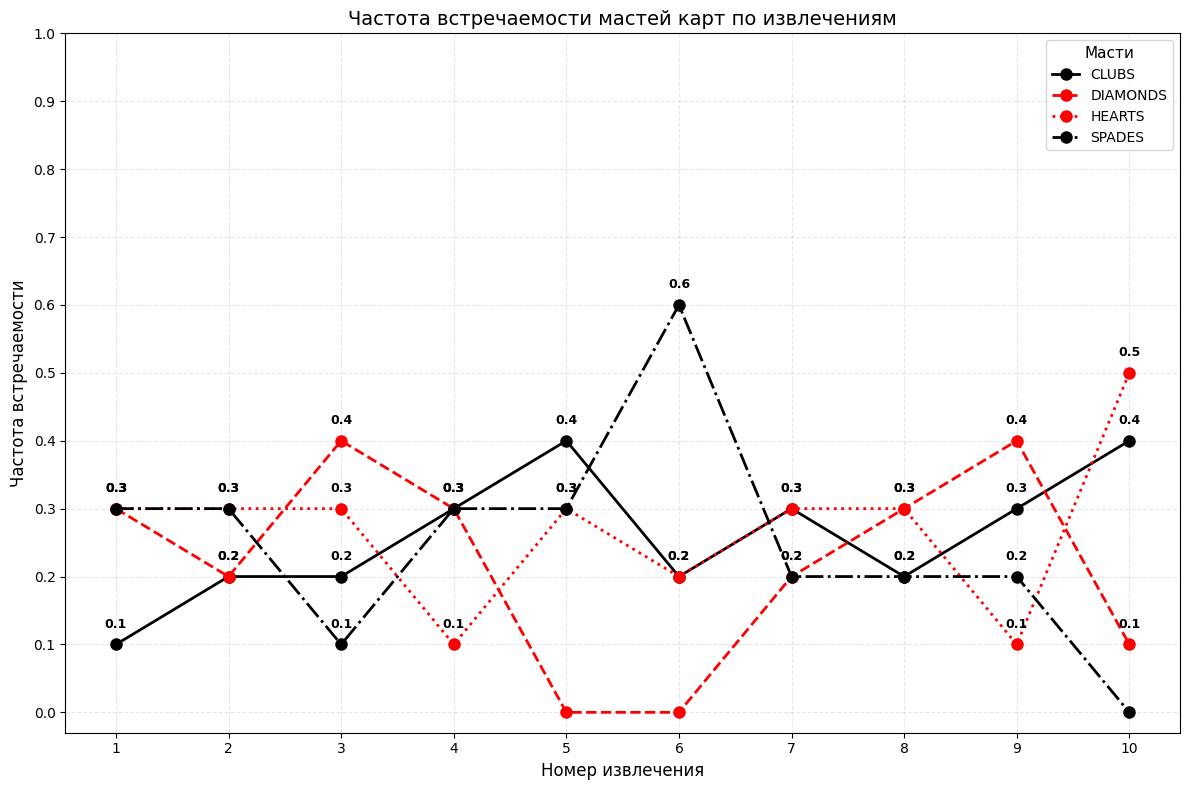

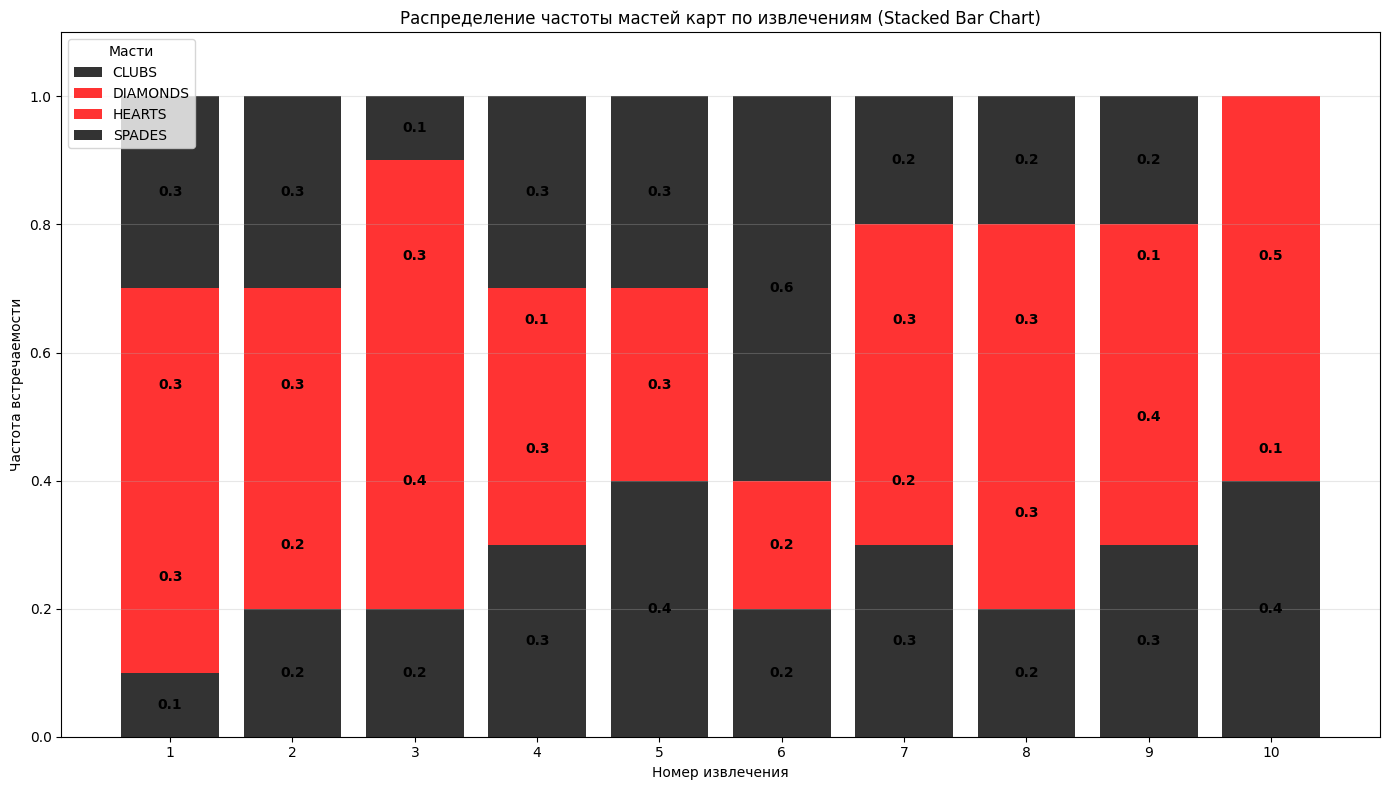


Статистика по частоте встречаемости:
Средняя частота по мастям:
CLUBS       0.26
DIAMONDS    0.22
HEARTS      0.27
SPADES      0.25
dtype: float64

Медиана частоты по мастям:
CLUBS       0.25
DIAMONDS    0.25
HEARTS      0.30
SPADES      0.25
dtype: float64

Стандартное отклонение частоты по мастям:
CLUBS       0.096609
DIAMONDS    0.147573
HEARTS      0.115950
SPADES      0.158114
dtype: float64


In [6]:
import matplotlib.pyplot as plt

# Рассчитываем частоту встречаемости (делим на 10)
df_frequency = df / 10

print("Частота встречаемости каждой масти по извлечениям:")
print(df_frequency)

# Построение графика частоты встречаемости
plt.figure(figsize=(12, 8))

# График для каждой масти отдельно
colors = ['black', 'red', 'red', 'black']
line_styles = ['-', '--', ':', '-.']

for i, (suit, color, line_style) in enumerate(zip(df_frequency.columns, ['black', 'red', 'red', 'black'], ['-', '--', ':', '-.'])):
    plt.plot(df_frequency.index + 1, df_frequency[suit],
             label=suit, color=color, linestyle=line_style,
             marker='o', linewidth=2, markersize=8)

plt.title('Частота встречаемости мастей карт по извлечениям', fontsize=14)
plt.xlabel('Номер извлечения', fontsize=12)
plt.ylabel('Частота встречаемости', fontsize=12)
plt.xticks(range(1, 11))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(title='Масти', fontsize=10, title_fontsize=11)
plt.tight_layout()

# Добавляем подписи значений на график
for i in range(len(df_frequency)):
    for suit in df_frequency.columns:
        value = df_frequency.iloc[i][suit]
        if value > 0:
            plt.text(i + 1, value + 0.02, f'{value:.1f}',
                    ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.show()

# Строим stacked bar chart для частот
plt.figure(figsize=(14, 8))

x = df_frequency.index + 1
bottom = np.zeros(len(df_frequency))

for i, suit in enumerate(df_frequency.columns):
    plt.bar(x, df_frequency[suit], bottom=bottom,
            label=suit, alpha=0.8,
            color=['black', 'red', 'red', 'black'][i])

    # Добавляем подписи значений
    for j, (measurement, value) in enumerate(zip(x, df_frequency[suit])):
        if value > 0:
            plt.text(measurement, bottom[j] + value/2, f'{value:.1f}',
                    ha='center', va='center', fontweight='bold', fontsize=10)

    bottom += df_frequency[suit].values

plt.xlabel('Номер извлечения')
plt.ylabel('Частота встречаемости')
plt.title('Распределение частоты мастей карт по извлечениям (Stacked Bar Chart)')
plt.legend(title='Масти')
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(x)
plt.ylim(0, 1.1)

plt.tight_layout()
plt.show()

# Дополнительный анализ
print("\nСтатистика по частоте встречаемости:")
print("Средняя частота по мастям:")
print(df_frequency.mean())

print("\nМедиана частоты по мастям:")
print(df_frequency.median())

print("\nСтандартное отклонение частоты по мастям:")
print(df_frequency.std())